5. What implications might your findings have to the bank's approach to lending? 


In [1]:
import pandas as pd

# Import the data
application_data = pd.read_csv("application_record.csv")
credit_data = pd.read_csv("credit_record.csv")

# Merge the application and credit record datasets based on the client ID
merged_data = pd.merge(application_data, credit_data, on="ID")

# Filter out non-numeric values in the "STATUS" column
merged_data = merged_data[merged_data["STATUS"].str.isnumeric()]

# Analyze the strongest indicators of credit risk
attributes = ["AMT_INCOME_TOTAL", "NAME_EDUCATION_TYPE", "CNT_CHILDREN", "NAME_INCOME_TYPE", "STATUS"]

# Calculate the average credit record status for different attribute categories
average_status_by_attribute = merged_data.groupby(attributes)["STATUS"].mean()

# Print the average credit record status for each attribute category
print("Average Credit Record Status by Attribute Category:")
print(average_status_by_attribute)


Average Credit Record Status by Attribute Category:
AMT_INCOME_TOTAL  NAME_EDUCATION_TYPE            CNT_CHILDREN  NAME_INCOME_TYPE      STATUS
27000.0           Higher education               0             Working               0                 0.0
                                                                                     1              277.75
                  Secondary / secondary special  0             Working               0                 0.0
29250.0           Secondary / secondary special  0             Pensioner             0                 0.0
30150.0           Lower secondary                0             Pensioner             0                 0.0
                                                                                                  ...     
1125000.0         Secondary / secondary special  0             Commercial associate  1              277.75
1350000.0         Higher education               0             Commercial associate  0                 0.0


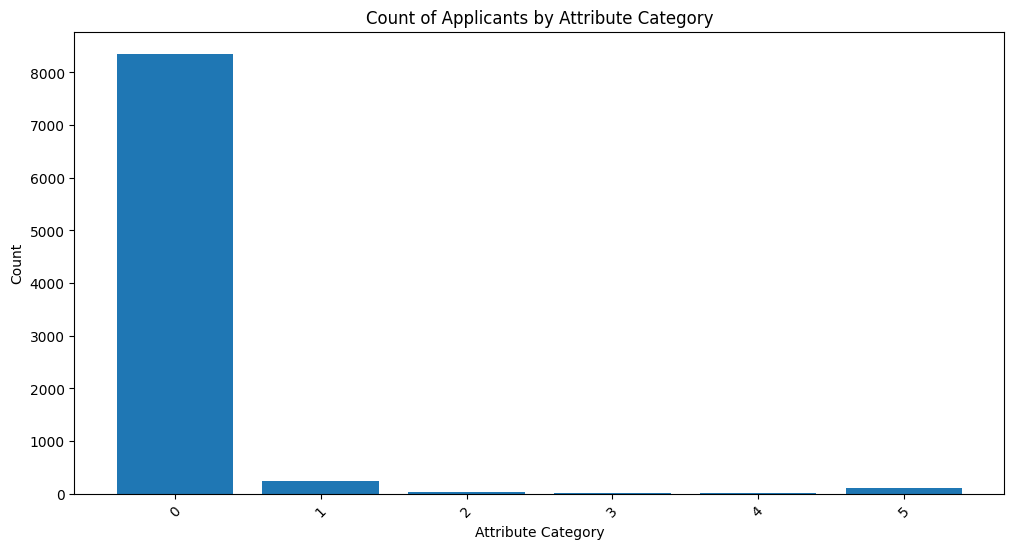

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Import the data
application_data = pd.read_csv("application_record.csv")
credit_data = pd.read_csv("credit_record.csv")

# Merge the application and credit record datasets based on the client ID
merged_data = pd.merge(application_data, credit_data, on="ID")

# Filter out non-numeric values in the "STATUS" column
merged_data = merged_data[merged_data["STATUS"].str.isnumeric()]

# Analyze the strongest indicators of credit risk
attributes = ["AMT_INCOME_TOTAL", "NAME_EDUCATION_TYPE", "CNT_CHILDREN", "NAME_INCOME_TYPE", "STATUS"]

# Calculate the average credit record status for different attribute categories
average_status_by_attribute = merged_data.groupby(attributes)["ID"].count().reset_index()
average_status_by_attribute.rename(columns={"ID": "Count"}, inplace=True)

# Plot the average credit record status for each attribute category
plt.figure(figsize=(12, 6))
plt.bar(average_status_by_attribute["STATUS"], average_status_by_attribute["Count"])
plt.xlabel("Attribute Category")
plt.ylabel("Count")
plt.title("Count of Applicants by Attribute Category")
plt.xticks(rotation=45)
plt.show()
